In [12]:
import dicom
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

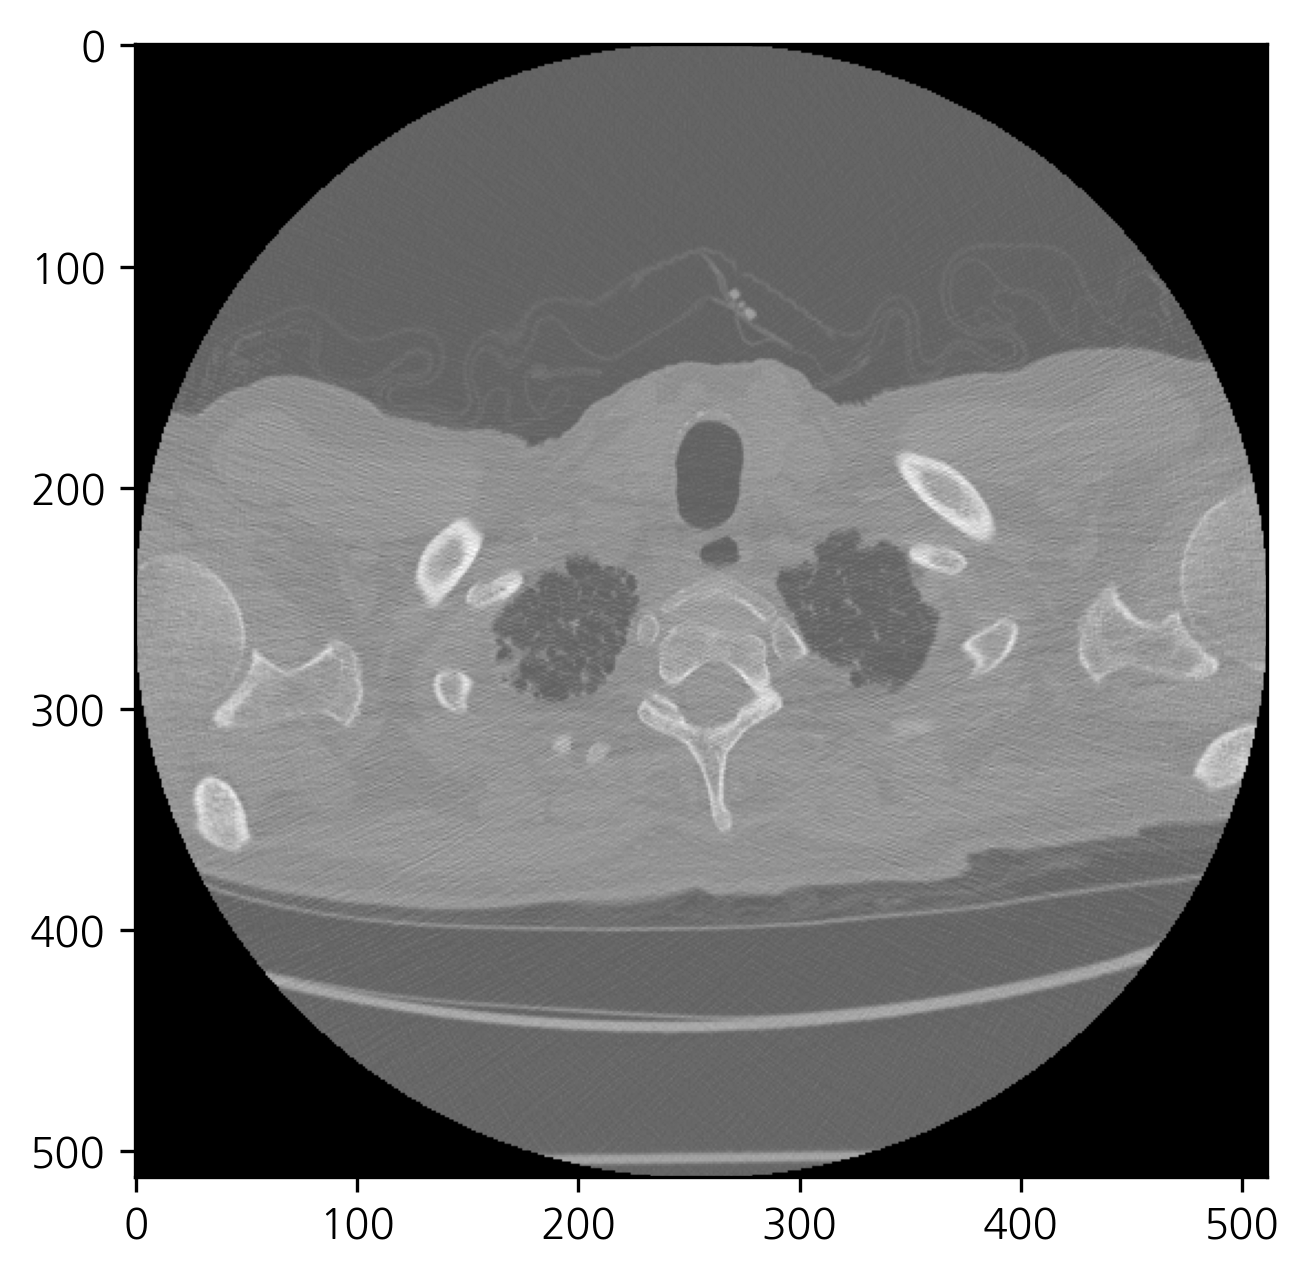

In [19]:
data = dicom.read_file("./train/ID00007637202177411956430/3.dcm")
a = data.pixel_array
b = np.shape(a)
plt.imshow(a, cmap='gray')
plt.show()

In [5]:
print(a)
print(b)

[[-2000 -2000 -2000 ... -2000 -2000 -2000]
 [-2000 -2000 -2000 ... -2000 -2000 -2000]
 [-2000 -2000 -2000 ... -2000 -2000 -2000]
 ...
 [-2000 -2000 -2000 ... -2000 -2000 -2000]
 [-2000 -2000 -2000 ... -2000 -2000 -2000]
 [-2000 -2000 -2000 ... -2000 -2000 -2000]]
(512, 512)


tf.Tensor(b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00DICM\x02\x00\x00\x00UL\x04\x00\xc8\x00\x00\x00\x02\x00\x01\x00OB\x00\x00\x02\x00\x00\x00\x00\x01\x02\x00\x02\x00UI\x1a\x001.2.840.10008.5.1.4.1.1.2\x00\x02\x00\x03\x00UI,\x002.25.12297650151329871895440507938349160734\x00\x02\x00\x10\x00UI\x14\x001.2.840.10008.1.2.1\x00\x02\x00\x12\x00UI\x1c\x001.2.276.0.7230010.3.0.3.6.1\x00\x02\x00\x13\x00SH\n\x00OSIRIX_361\x02\x00\x16\x00AE\n\x00ANONYMOUS \x08\x00\x05\x00CS\n\x00ISO_IR 100\x08\x00\x08\x00CS\x16\x00ORIGINAL\\PRIMARY\\AX

TypeError: Invalid shape (0,) for image data

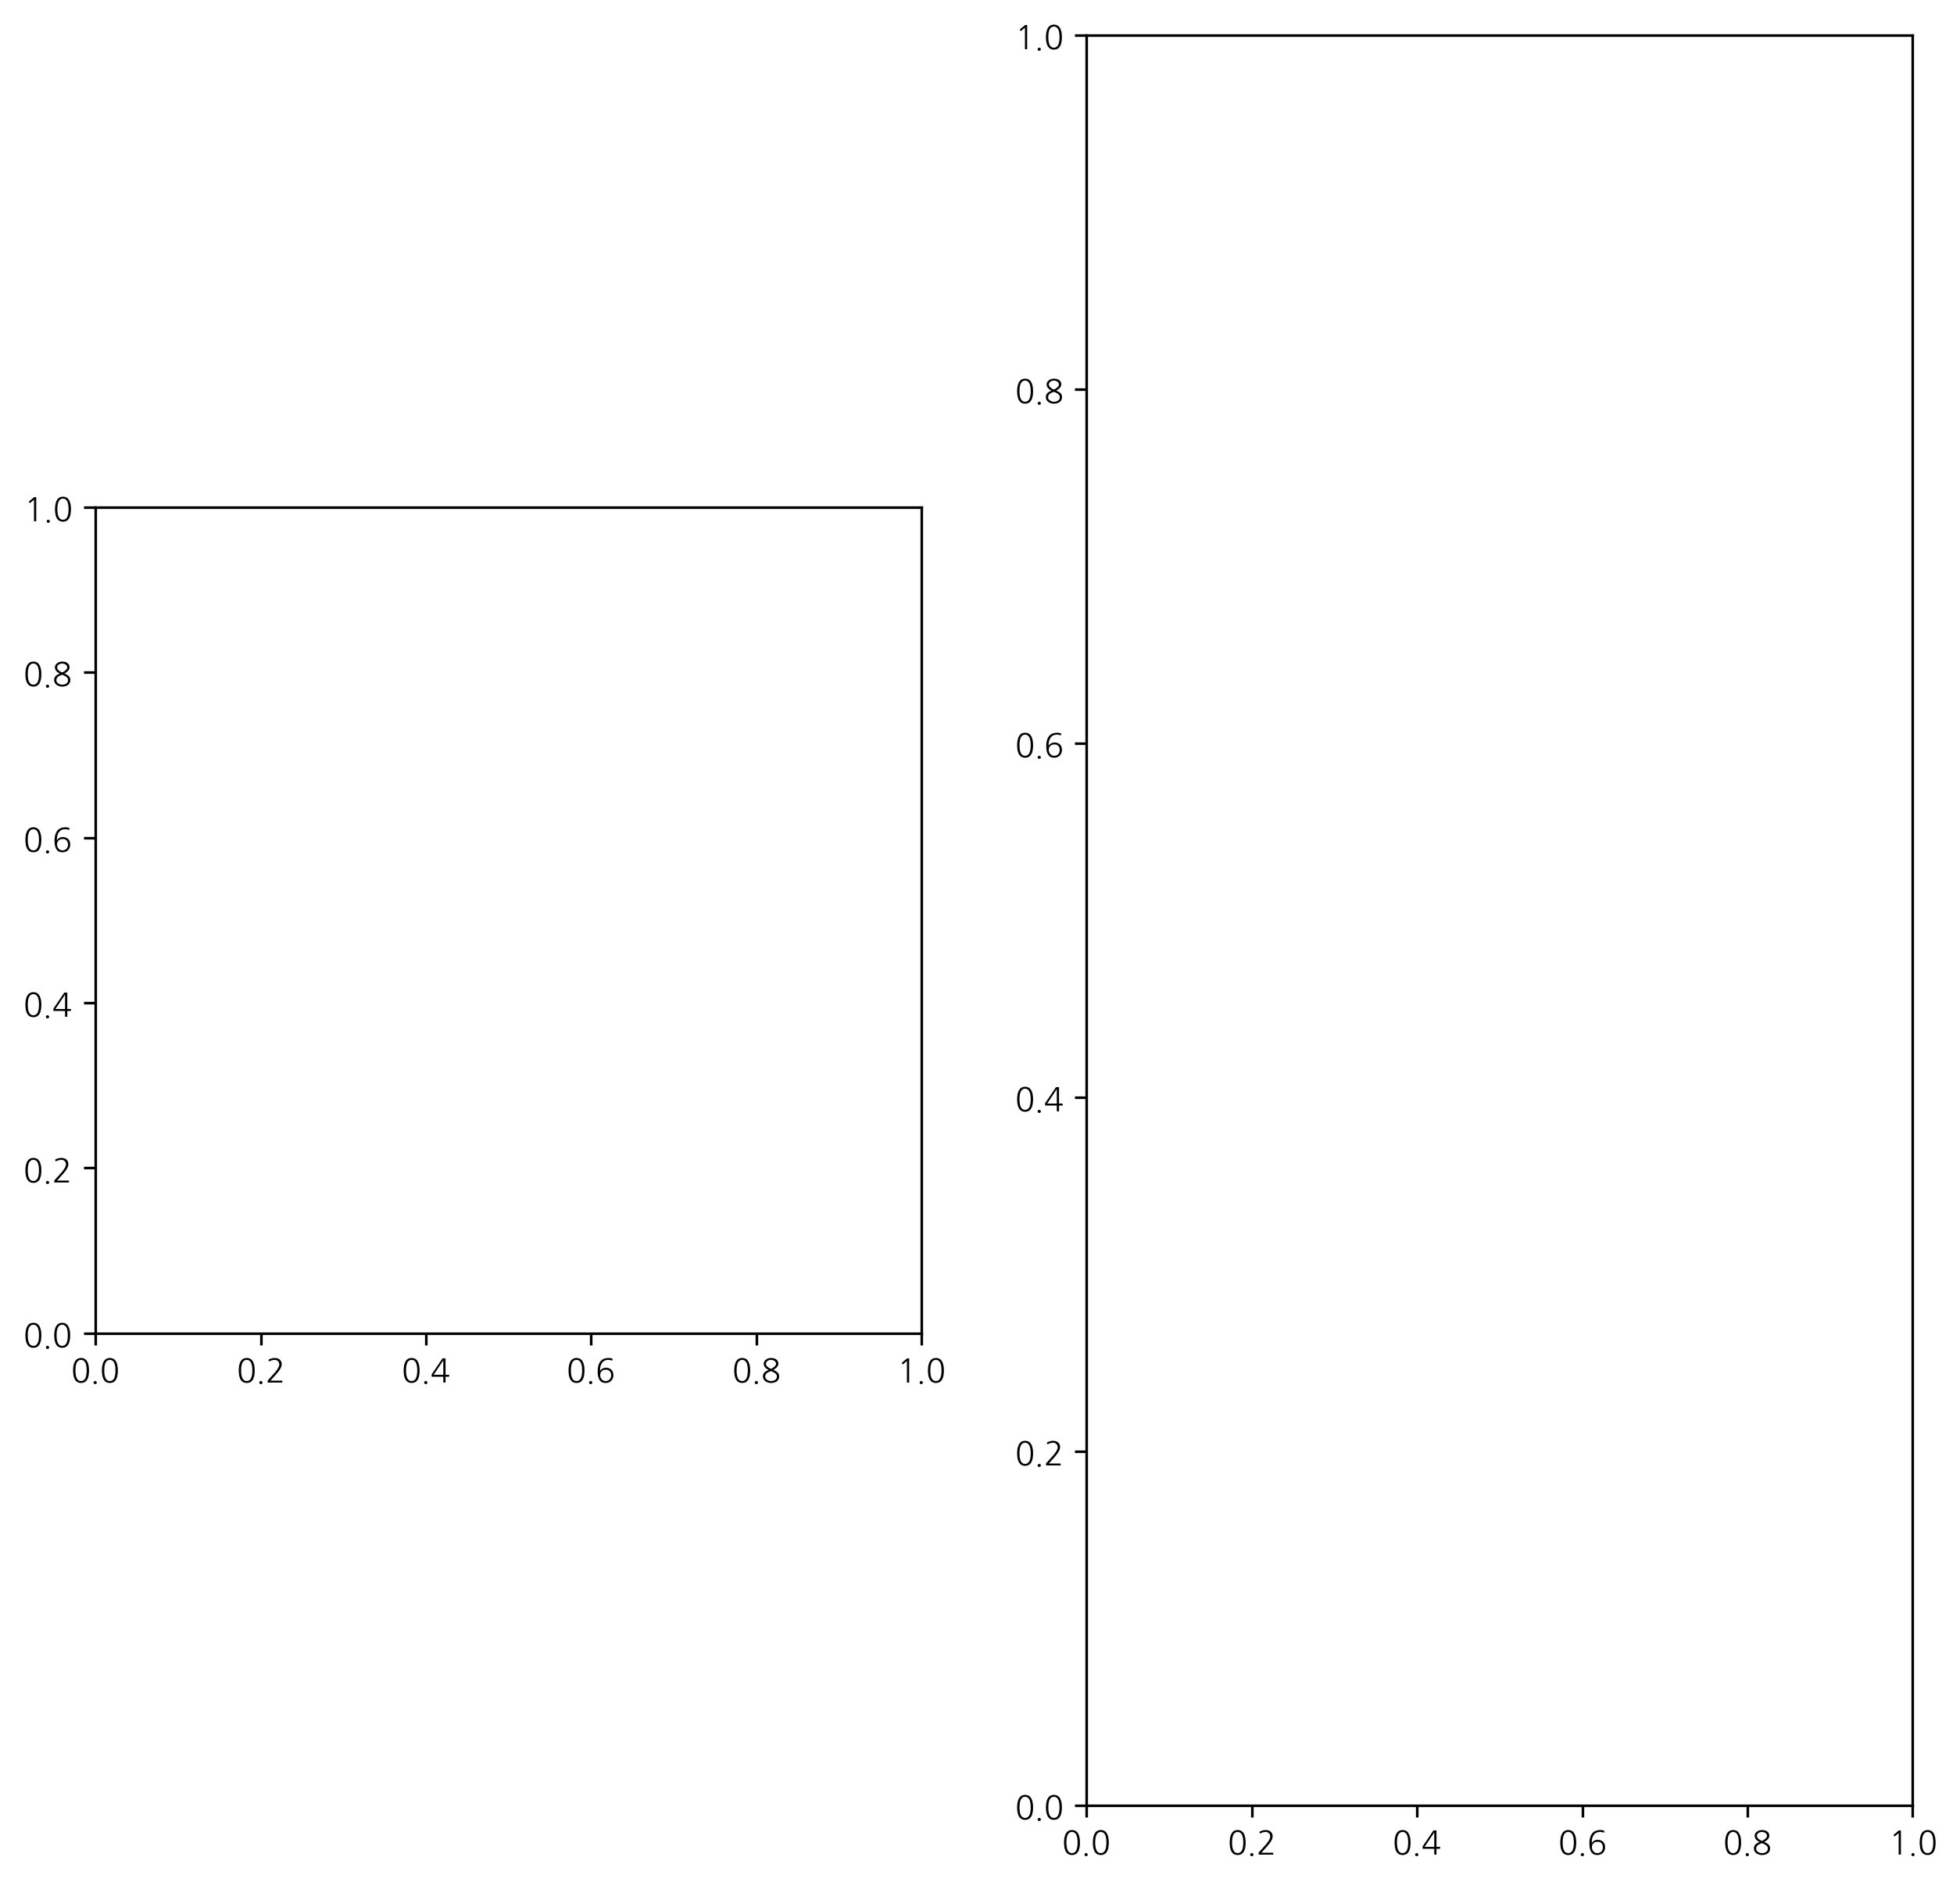

In [11]:
image_bytes = tf.io.read_file('./train/ID00007637202177411956430/1.dcm')

image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16)

skipped = tfio.image.decode_dicom_image(image_bytes, on_error='skip', dtype=tf.uint8)

lossy_image = tfio.image.decode_dicom_image(image_bytes, scale='auto', on_error='lossy', dtype=tf.uint8)

fig, axes = plt.subplots(1,2, figsize=(10,10))
axes.shape
axes[0].imshow(np.squeeze(image.numpy()), cmap='gray')
# axes[0].imshow(np.squeeze(image.numpy()), cmap='gray')
# axes[0].set_title('image')
# axes[1].imshow(np.squeeze(lossy_image.numpy()), cmap='gray')
# axes[1].set_title('lossy image');